In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define Data

This data is generated to loosely satisfy the assumptions held by the OLS method.
- Linearity in connection
- Normality of Error Distribution
- Constant Variance
- Minimal Outliers

In [2]:
# Sample Size
n_samples = 500

# Define the Independent Variable/Feature
low, high = 0, 20
X = np.random.uniform(low=low, high=high, size=n_samples)

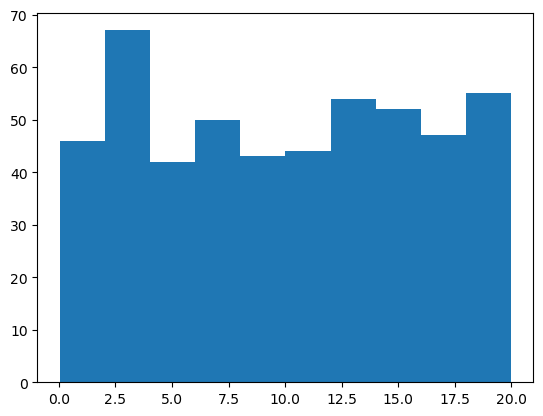

In [3]:
plt.hist(X);

In [4]:
# Define the Dependent Variable/Outcome
distribution_mean, distribution_std = 0, 2.5
Y = 2*X + np.random.normal(loc=distribution_mean, scale=distribution_std, size=n_samples)

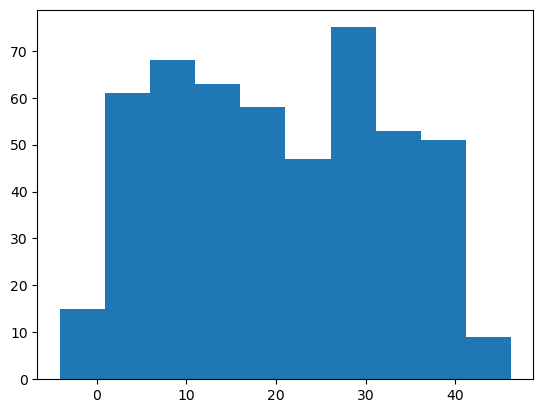

In [5]:
plt.hist(Y);

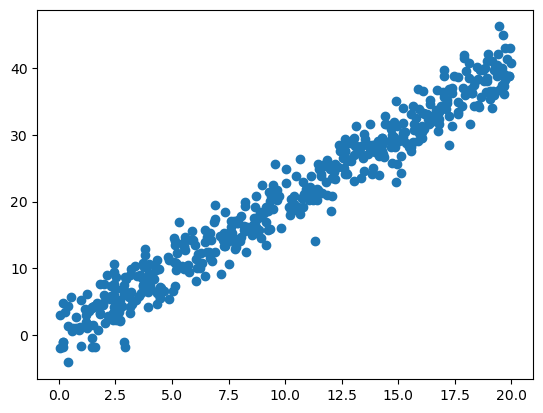

In [6]:
plt.scatter(X, Y);

### OLS from Scratch
Proof I used to understand the concept can be found in this link: https://statproofbook.github.io/P/slr-ols.html

In [7]:
def get_ols_line_plot(x: np.array, y:np.array, printer: bool = True) -> [float, float]:
    """ This function inputs a single predictor and outcome pair to produce an OLS line. Finally,
     a plot is generated where the OLS line is laid over the scatter plot. 
    
    :param x: Predictor
    :param y: Outcome
    :param printer: Whether the fit is visualized or not.
    :return: None
    """
    x_mean = x.mean()
    y_mean = y.mean()
    
    error_in_x = x - x_mean
    error_in_y = y - y_mean
    
    m = (error_in_x * error_in_y).sum()/((error_in_x)**2).sum()
    c = y_mean - m * x_mean
    
    fit = m*x + c
    
    if printer:
        plt.scatter(x,y)
        plt.plot(x, fit, color="red")
        plt.title(f"Regression line using OLS || m={m} & c={c}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid()
        plt.show()
    
    return m, c

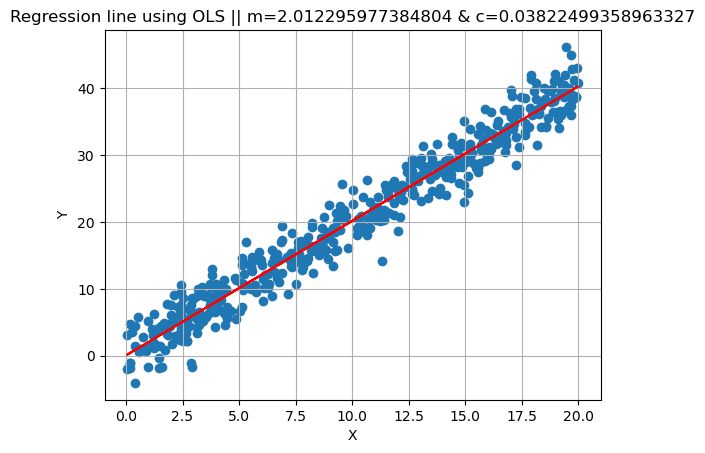

(2.012295977384804, 0.03822499358963327)

In [8]:
get_ols_line_plot(X, Y)

### Utilizing Python Packages: Statsmodels

statsmodels.sm.OLS seems to contain the relevant functionality to produce an OLS regression line 
given X and Y. 

In [9]:
import statsmodels.api as sm

In [10]:
X_mod = X = sm.add_constant(X)  # <-- This adds intercept. (Remember to add this) 
model = sm.OLS(Y, X_mod)

In [11]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:18:12   Log-Likelihood:                -1158.2
No. Observations:                 500   AIC:                             2320.
Df Residuals:                     498   BIC:                             2329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0382      0.218      0.176      0.861      -0.390       0.466
x1             2.0123      0.019    107.298      0.000       1.975       2.049
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.673
Skew:                          -0.043   Prob(JB):                        0.714
Kurtosis:                       3.157   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results.params

array([0.03822499, 2.01229598])

In [13]:
results.rsquared

0.9585374702548621